In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef

df = pd.read_csv('../data/data-923.csv')
# df = df.drop(columns=['num'])

label_encoder = LabelEncoder()
df['A_encoded'] = label_encoder.fit_transform(df['cate'])
y = df['A_encoded']
X = df[['en1','en2','en3','en4', 'en5', 'en6', 'en7', 'en8', 'en9', 'en10', 'en11', 'en12', 'en13', 'en14', 'en15']]

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42,stratify=y)

# 定义分类器及其参数
classifiers = {
    'DecisionTree': DecisionTreeClassifier(criterion='entropy',random_state=42),
    # SVM 支持多种核函数，包括线性核（linear）、多项式核（poly）、径向基函数（RBF，rbf）和sigmoid核。对于非线性问题，通常使用非线性核函数，RBF 是最常用的选择。
    # 'SVM': SVC(probability=True, kernel='rbf',random_state=42),
    # 'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    # 'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42),
    'KNeighbors': KNeighborsClassifier(weights='distance'),
    'GaussianNB': GaussianNB(var_smoothing=1e-2),
    # 'AdaBoost': AdaBoostClassifier(learning_rate=0.1,random_state=42),
    'MLP (Neural Network)': MLPClassifier(hidden_layer_sizes=(100,), max_iter=100,learning_rate_init=0.01, random_state=42),
    # 'Logistic Regression': LogisticRegression(),
    'LDA': LinearDiscriminantAnalysis(),
    # 'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss'),
    # 'LightGBM': lgb.LGBMClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
    'Extra Trees': ExtraTreesClassifier()
}

# 封装训练和评估模型的函数
def train_evaluate(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    kappa = matthews_corrcoef(y_test, y_pred)

    print(f"模型：{clf.__class__.__name__}")
    print(f'Accuracy: {accuracy}')
    print(f'Recall: {recall}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}')
    print(f'Kappa Coefficient: {kappa}')
    print('------')
    
    # print(', '.join(y_test.astype(str)))
    # print(y_pred)

# 创建一个投票分类器
voting_clf = VotingClassifier(estimators=[(name, clf) for name, clf in classifiers.items()], voting='soft')

for name, clf in classifiers.items():
    train_evaluate(clf,X_train,y_train,X_test,y_test)

train_evaluate(voting_clf,X_train,y_train,X_test,y_test)


/Users/lizhanwei/miniconda3/envs/tony/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/Users/lizhanwei/miniconda3/envs/tony/lib/python3.10/site-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
/Users/lizhanwei/miniconda3/envs/tony/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/Users/lizhanwei/miniconda3/

模型：DecisionTreeClassifier
Accuracy: 0.9166666666666666
Recall: 0.9230769230769231
Precision: 0.9358974358974359
F1 Score: 0.9076923076923076
Kappa Coefficient: 0.9130451096264045
------
模型：KNeighborsClassifier
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Kappa Coefficient: 1.0
------
模型：GaussianNB
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Kappa Coefficient: 1.0
------
模型：MLPClassifier
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Kappa Coefficient: 1.0
------
模型：LinearDiscriminantAnalysis
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Kappa Coefficient: 1.0
------


/Users/lizhanwei/miniconda3/envs/tony/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/Users/lizhanwei/miniconda3/envs/tony/lib/python3.10/site-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
/Users/lizhanwei/miniconda3/envs/tony/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/Users/lizhanwei/miniconda3/

模型：CatBoostClassifier
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Kappa Coefficient: 1.0
------
模型：ExtraTreesClassifier
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Kappa Coefficient: 1.0
------
模型：VotingClassifier
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Kappa Coefficient: 1.0
------


/Users/lizhanwei/miniconda3/envs/tony/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/Users/lizhanwei/miniconda3/envs/tony/lib/python3.10/site-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
/Users/lizhanwei/miniconda3/envs/tony/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/Users/lizhanwei/miniconda3/


模型：Decision Tree
Accuracy: 1.0; Recall: 1.0; Precision: 1.0; F1: 1.0; MCC(Kappa): 1.0


/Users/lizhanwei/miniconda3/envs/tony/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/Users/lizhanwei/miniconda3/envs/tony/lib/python3.10/site-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
/Users/lizhanwei/miniconda3/envs/tony/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/Users/lizhanwei/miniconda3/

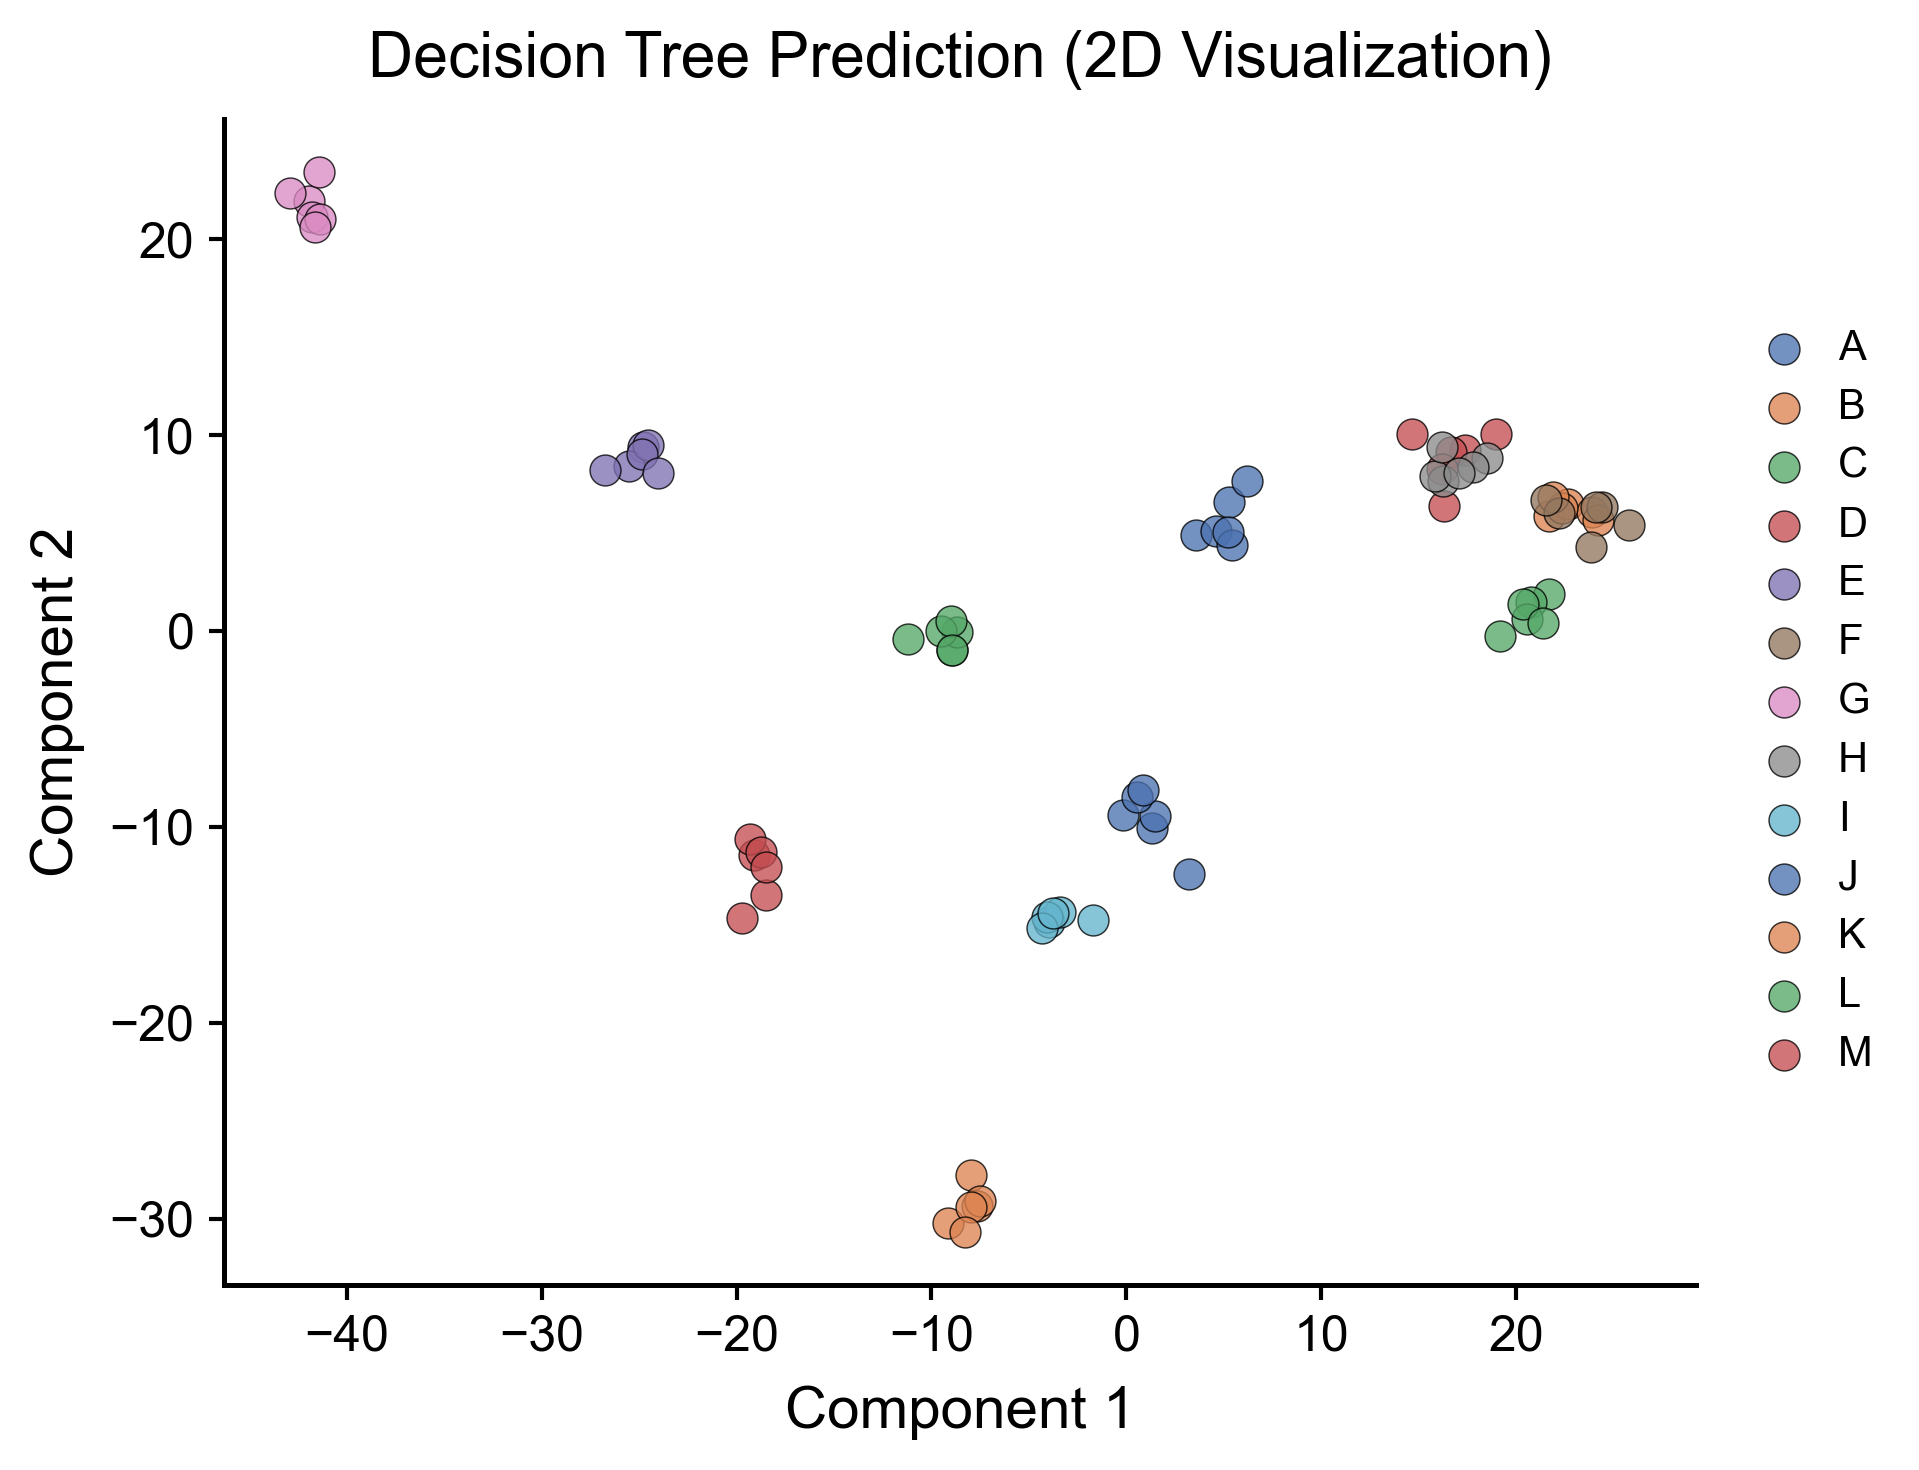


模型：Naive Bayes
Accuracy: 1.0; Recall: 1.0; Precision: 1.0; F1: 1.0; MCC(Kappa): 1.0


/Users/lizhanwei/miniconda3/envs/tony/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/Users/lizhanwei/miniconda3/envs/tony/lib/python3.10/site-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
/Users/lizhanwei/miniconda3/envs/tony/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/Users/lizhanwei/miniconda3/

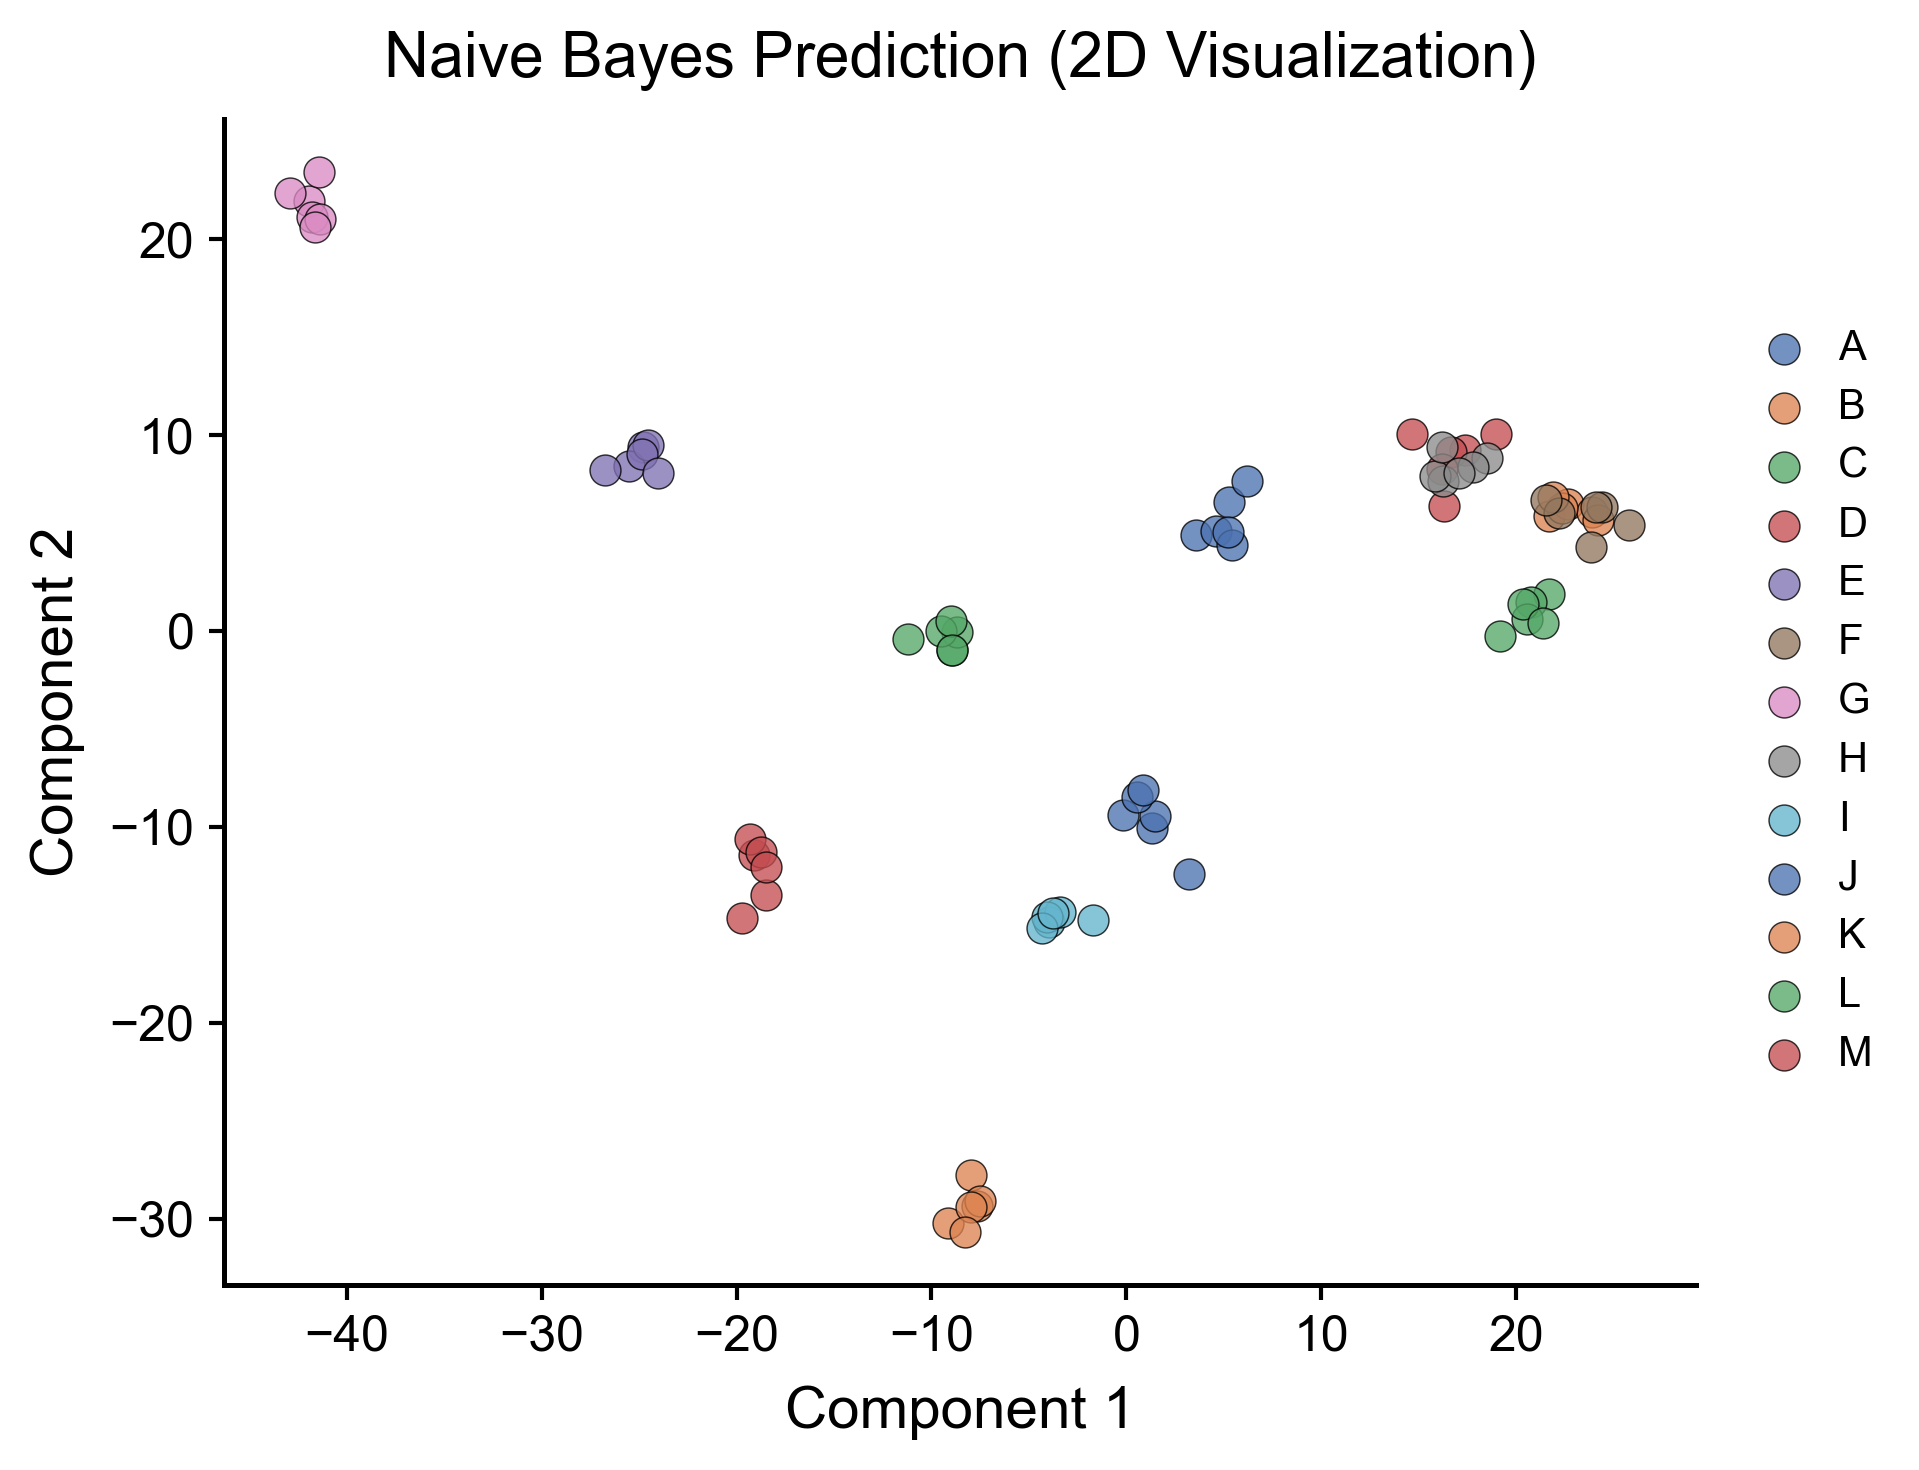

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt

# ============================================================
# Nature 风格可视化函数（右侧图例）
# ============================================================
def plot_nature_scatter(X2d, y_labels, title="Nature-style Plot", save_name=None):
    plt.rcParams.update({
        "font.family": "Arial",
        "figure.dpi": 300,
        "savefig.dpi": 300,
        "axes.linewidth": 1.2,
        "axes.labelsize": 14,
        "axes.titlesize": 15,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "xtick.major.width": 1.0,
        "ytick.major.width": 1.0,
        "legend.frameon": False,
        "axes.facecolor": "white",
        "axes.edgecolor": "black",
    })

    nature_colors = [
        "#4C72B0", "#DD8452", "#55A868",
        "#C44E52", "#8172B3", "#937860",
        "#DA8BC3", "#8C8C8C", "#64B5CD"
    ]

    plt.figure(figsize=(6.5, 5))
    unique_classes = np.unique(y_labels)

    for i, cls in enumerate(unique_classes):
        idx = (y_labels == cls)
        plt.scatter(
            X2d[idx, 0], X2d[idx, 1],
            s=55, alpha=0.78,
            color=nature_colors[i % len(nature_colors)],
            edgecolor="black", linewidth=0.35,
            label=str(cls)
        )

    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.xlabel("Component 1", labelpad=6)
    plt.ylabel("Component 2", labelpad=6)
    plt.title(title, pad=10)

    # 图例在右侧
    plt.legend(
        loc="center left",
        bbox_to_anchor=(1.02, 0.5),
        frameon=False,
        borderaxespad=0,
        handletextpad=0.3
    )

    plt.tight_layout()
    if save_name:
        plt.savefig(f"{save_name}.pdf", bbox_inches="tight")
        plt.savefig(f"{save_name}.svg", bbox_inches="tight")
    plt.show()


# ============================================================
# 读取数据
# ============================================================
df = pd.read_csv("../data/data-923.csv")
label_encoder = LabelEncoder()
df["cate_str"] = df["cate"].astype(str)
df["cate_encoded"] = label_encoder.fit_transform(df["cate_str"])

y = df["cate_encoded"]
X = df[[f"en{i}" for i in range(1, 16)]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ============================================================
# PCA / LDA 降维
# ============================================================
use_lda = True  # True 使用 LDA，False 使用 PCA

if use_lda:
    # LDA 降维，最多 n_classes-1
    lda = LinearDiscriminantAnalysis(n_components= min(8, len(np.unique(y))-1))
    X_reduced = lda.fit_transform(X_scaled, y)
else:
    # PCA 降维
    pca = PCA(n_components=8)
    X_reduced = pca.fit_transform(X_scaled)

# ============================================================
# 划分训练集（全部降维后的维度用于训练）
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.3, stratify=y, random_state=42
)

# ============================================================
# 模型列表
# ============================================================
models = {
    "Decision Tree": DecisionTreeClassifier(criterion="entropy"),
    #"KNN": KNeighborsClassifier(weights="distance"),
    "Naive Bayes": GaussianNB(var_smoothing=1e-2),
    #"MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=150, learning_rate_init=0.01),
    #"CatBoost": CatBoostClassifier(silent=True),
    #"Extra Trees": ExtraTreesClassifier()
}

# ============================================================
# 训练 + 输出指标 + 可视化（前两维）
# ============================================================
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_str = label_encoder.inverse_transform(y_pred)

    # 输出指标
    print(f"\n模型：{name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}; "
          f"Recall: {recall_score(y_test, y_pred, average='macro')}; "
          f"Precision: {precision_score(y_test, y_pred, average='macro')}; "
          f"F1: {f1_score(y_test, y_pred, average='macro')}; "
          f"MCC(Kappa): {matthews_corrcoef(y_test, y_pred)}")

    # 可视化：只用降维后的前两维定义 XY
    plot_nature_scatter(
        X_reduced[:, :2],
        label_encoder.inverse_transform(clf.predict(X_reduced)),
        title=f"{name} Prediction (2D Visualization)",
        save_name=f"{name}_2D_Nature"
    )


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import chi2
import os

# ===================== 工具函数：生成置信椭球 (保持不变) =====================
def get_confidence_ellipsoid(x, y, z, confidence=0.9):
    data = np.vstack((x, y, z))
    if data.shape[1] < 4: return None, None, None
    mean = np.mean(data, axis=1)
    cov = np.cov(data)
    eigvals, eigvecs = np.linalg.eigh(cov)
    scale_factor = np.sqrt(chi2.ppf(confidence, df=3))
    u = np.linspace(0, 2 * np.pi, 20)
    v = np.linspace(0, np.pi, 20)
    x_sphere = np.outer(np.cos(u), np.sin(v))
    y_sphere = np.outer(np.sin(u), np.sin(v))
    z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))
    sphere_points = np.stack((x_sphere.flatten(), y_sphere.flatten(), z_sphere.flatten()))
    radii = np.sqrt(np.maximum(eigvals, 0)) * scale_factor
    transformed = (eigvecs @ np.diag(radii) @ sphere_points).T + mean
    return transformed[:, 0], transformed[:, 1], transformed[:, 2]

# ===================== 1. 数据准备 =====================
df = pd.read_csv("../data/data-923.csv")
label_encoder = LabelEncoder()
df["cate_encoded"] = label_encoder.fit_transform(df["cate"].astype(str))
y = df["cate_encoded"]
X = df[[f"en{i}" for i in range(1, 16)]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# LDA 降维
lda = LinearDiscriminantAnalysis(n_components=min(3, len(np.unique(y)) - 1))
X_reduced_all = lda.fit_transform(X_scaled, y)
X_plot_3d = X_reduced_all[:, :3]

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced_all, y, test_size=0.3, stratify=y, random_state=42
)

# ===================== 2. 模型训练与指标计算 (测试集) =====================
model = GaussianNB(var_smoothing=1e-2)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

metric_map = {}
unique_labels_encoded = np.unique(y_test)
unique_labels_str = label_encoder.inverse_transform(unique_labels_encoded)

for i, label_str in enumerate(unique_labels_str):
    tp = cm[i, i]
    total_true = cm[i, :].sum()
    recall = tp / total_true if total_true > 0 else 0
    total_pred = cm[:, i].sum()
    precision = tp / total_pred if total_pred > 0 else 0
    metric_map[label_str] = f" | R:{recall:.2f}, P:{precision:.2f}"
    # print(f"Class {label_str}: Recall={recall:.2f}, Precision={precision:.2f}") # 可以取消注释查看

# --- 准备全量数据的绘图数据 ---
all_probs = model.predict_proba(X_reduced_all)
confidence_scores = np.max(all_probs, axis=1)
y_pred = model.predict(X_reduced_all)
y_pred_str = label_encoder.inverse_transform(y_pred)
y_true_str = label_encoder.inverse_transform(y)

df_plot = pd.DataFrame({
    "Comp1": X_plot_3d[:, 0], "Comp2": X_plot_3d[:, 1], "Comp3": X_plot_3d[:, 2],
    "True Label": y_true_str, "Predicted Label": y_pred_str, "Confidence": confidence_scores,
    "Is_Correct": y == y_pred
})
df_plot["Status"] = np.where(df_plot["Is_Correct"], "Correct", "Misclassified")

# ===================== 3. 绘图：颜色和图例优化 =====================
output_dir = "3D_Optimized_Legend"
os.makedirs(output_dir, exist_ok=True)

# --- 关键修改：生成足够多的不重复颜色 ---
# 如果类别很多，可能需要 Plotly 之外的调色板，例如 matplotlib 的'tab20'或'Paired'
# 这里使用 Plotly 默认的定性色板，它通常能处理10个左右的不同颜色
# 如果类别数大于len(px.colors.qualitative.Plotly)，颜色会重复。
# 更好的做法是生成一个更长的颜色列表，例如：
num_classes = len(unique_labels_str)
colors_base = px.colors.qualitative.Alphabet if num_classes > 10 else px.colors.qualitative.Plotly
colors_extended = colors_base * ((num_classes // len(colors_base)) + 1)
color_map = {label: colors_extended[i] for i, label in enumerate(unique_labels_str)}


fig = go.Figure()
print("正在生成图表...")

# 添加一个额外的空散点图，专门用于图例中的 "Misclassified" 标记
# 这个标记将是统一的，不区分具体类别，仅代表“预测错误”这一概念
fig.add_trace(go.Scatter3d(
    x=[None], y=[None], z=[None], # 不显示实际点
    mode='markers',
    marker=dict(symbol='diamond-open', color='rgba(0,0,0,0.5)', size=8), # 统一的灰色菱形
    name='Misclassified Points', # 图例名称
    showlegend=True,
    legendgroup='_misc', # 单独分组
    hoverinfo='skip'
))


for label in unique_labels_str:
    subset = df_plot[df_plot["True Label"] == label]
    color = color_map[label]
    metrics_suffix = metric_map.get(label, "")
    
    # --- A. 绘制 90% 置信椭球 (主图例项，带有颜色色块和指标) ---
    ex, ey, ez = get_confidence_ellipsoid(
        subset["Comp1"].values, subset["Comp2"].values, subset["Comp3"].values, confidence=0.9
    )
    if ex is not None:
        fig.add_trace(go.Mesh3d(
            x=ex, y=ey, z=ez,
            alphahull=0, opacity=0.15, color=color,
            name=f"{label}{metrics_suffix}", # 显示类别和指标
            legendgroup=label,
            showlegend=True,
            hoverinfo='skip',
            # --- 关键修改：用点代替 Mesh 的图例标记 ---
            # 这是因为 Mesh3d 的图例标记默认是和 Mesh 一样的方块，我们想要圆形
            # 所以我们用一个看不见的 Scatter 来“伪造”这个图例标记
            marker_dict=dict(color=color, symbol='circle', size=10) # 这是一个尝试，但通常Mesh3D不支持直接改图例markder
        ))
        # 更好的方法是添加一个不可见的散点图来控制图例标记
        fig.add_trace(go.Scatter3d(
            x=[None], y=[None], z=[None], # 不显示点
            mode='markers',
            marker=dict(color=color, symbol='circle', size=10), # 圆形色块
            name=f"{label}{metrics_suffix}", # 再次命名，这个trace是用来显示图例的
            legendgroup=label,
            showlegend=True, # 显示图例
            hoverinfo='skip',
            visible='legendonly', # 默认不显示在图上，只显示在图例中
            legendrank=0 # 确保它排在最前面
        ))
        # 因为我们用不可见的scatter作为主图例，所以原来的mesh3d就不需要显示图例了
        fig.data[-2].showlegend = False # 隐藏Mesh3d自己的图例


    # --- B. 绘制散点 (区分正确与错误) ---
    # 正确分类的散点，不显示图例，只显示在图上
    sub_subset_correct = subset[subset["Status"] == "Correct"]
    if not sub_subset_correct.empty:
        custom_data_correct = np.stack((
            sub_subset_correct["True Label"], sub_subset_correct["Predicted Label"],
            sub_subset_correct["Status"], sub_subset_correct["Confidence"]
        ), axis=-1)
        fig.add_trace(go.Scatter3d(
            x=sub_subset_correct["Comp1"], y=sub_subset_correct["Comp2"], z=sub_subset_correct["Comp3"],
            mode='markers',
            name=f"{label} (Correct)", # 这个name会显示在hover中
            legendgroup=label,
            showlegend=False, # 不在图例中显示
            marker=dict(
                size=sub_subset_correct["Confidence"] * 10 + 2,
                color=color,
                symbol='circle',
                opacity=0.9,
                line=dict(width=0)
            ),
            customdata=custom_data_correct,
            hovertemplate=(
                "<b>True Label: %{customdata[0]}</b><br>" +
                "Predicted: %{customdata[1]}<br>" +
                "Status: %{customdata[2]}<br>" +
                "Confidence: %{customdata[3]:.1%}<br>" +
                "<extra></extra>"
            )
        ))
    
    # 错误分类的散点，现在是统一的灰色菱形，会有一个单独的图例项
    sub_subset_misclassified = subset[subset["Status"] == "Misclassified"]
    if not sub_subset_misclassified.empty:
        custom_data_misclassified = np.stack((
            sub_subset_misclassified["True Label"], sub_subset_misclassified["Predicted Label"],
            sub_subset_misclassified["Status"], sub_subset_misclassified["Confidence"]
        ), axis=-1)
        fig.add_trace(go.Scatter3d(
            x=sub_subset_misclassified["Comp1"], y=sub_subset_misclassified["Comp2"], z=sub_subset_misclassified["Comp3"],
            mode='markers',
            name=f"{label} (Misclassified)", # 仍然用于hover
            legendgroup='_misc', # 分配到统一的错误分类组
            showlegend=False, # 不显示在图例中，因为我们已经有统一的 "Misclassified Points"
            marker=dict(
                size=sub_subset_misclassified["Confidence"] * 10 + 2,
                color=color, # 颜色仍然是其True Label的颜色
                symbol='diamond-open', # 空心菱形
                opacity=0.9,
                line=dict(width=0)
            ),
            customdata=custom_data_misclassified,
            hovertemplate=(
                "<b>True Label: %{customdata[0]}</b><br>" +
                "Predicted: %{customdata[1]}<br>" +
                "Status: %{customdata[2]}<br>" +
                "Confidence: %{customdata[3]:.1%}<br>" +
                "<extra></extra>"
            )
        ))

# ===================== 4. 布局优化 =====================
fig.update_layout(
    title="3D Analysis: Per-Class Test Set Metrics in Legend (Optimized)",
    scene=dict(
        xaxis_title='LDA Component 1',
        yaxis_title='LDA Component 2',
        zaxis_title='LDA Component 3',
        aspectmode='cube'
    ),
    width=1200,
    height=900,
    legend=dict(
        title="Class (R=Recall, P=Precision)",
        itemsizing='constant',
        groupclick="toggleitem"
    )
)

html_file = os.path.join(output_dir, "Optimized_Legend_Analysis.html")
fig.write_html(html_file)
print(f"Saved: {html_file}")

/Users/lizhanwei/miniconda3/envs/tony/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/Users/lizhanwei/miniconda3/envs/tony/lib/python3.10/site-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
/Users/lizhanwei/miniconda3/envs/tony/lib/python3.10/site-packages/sklearn/utils/multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)
/Users/lizhanwei/miniconda3/envs/tony/lib/pyt

正在生成图表...


ValueError: Invalid property specified for object of type plotly.graph_objs.Mesh3d: 'marker'

Did you mean "name"?

    Valid properties:
        alphahull
            Determines how the mesh surface triangles are derived
            from the set of vertices (points) represented by the
            `x`, `y` and `z` arrays, if the `i`, `j`, `k` arrays
            are not supplied. For general use of `mesh3d` it is
            preferred that `i`, `j`, `k` are supplied. If "-1",
            Delaunay triangulation is used, which is mainly
            suitable if the mesh is a single, more or less layer
            surface that is perpendicular to `delaunayaxis`. In
            case the `delaunayaxis` intersects the mesh surface at
            more than one point it will result triangles that are
            very long in the dimension of `delaunayaxis`. If ">0",
            the alpha-shape algorithm is used. In this case, the
            positive `alphahull` value signals the use of the
            alpha-shape algorithm, _and_ its value acts as the
            parameter for the mesh fitting. If 0,  the convex-hull
            algorithm is used. It is suitable for convex bodies or
            if the intention is to enclose the `x`, `y` and `z`
            point set into a convex hull.
        autocolorscale
            Determines whether the colorscale is a default palette
            (`autocolorscale: true`) or the palette determined by
            `colorscale`. In case `colorscale` is unspecified or
            `autocolorscale` is true, the default palette will be
            chosen according to whether numbers in the `color`
            array are all positive, all negative or mixed.
        cauto
            Determines whether or not the color domain is computed
            with respect to the input data (here `intensity`) or
            the bounds set in `cmin` and `cmax` Defaults to `false`
            when `cmin` and `cmax` are set by the user.
        cmax
            Sets the upper bound of the color domain. Value should
            have the same units as `intensity` and if set, `cmin`
            must be set as well.
        cmid
            Sets the mid-point of the color domain by scaling
            `cmin` and/or `cmax` to be equidistant to this point.
            Value should have the same units as `intensity`. Has no
            effect when `cauto` is `false`.
        cmin
            Sets the lower bound of the color domain. Value should
            have the same units as `intensity` and if set, `cmax`
            must be set as well.
        color
            Sets the color of the whole mesh
        coloraxis
            Sets a reference to a shared color axis. References to
            these shared color axes are "coloraxis", "coloraxis2",
            "coloraxis3", etc. Settings for these shared color axes
            are set in the layout, under `layout.coloraxis`,
            `layout.coloraxis2`, etc. Note that multiple color
            scales can be linked to the same color axis.
        colorbar
            :class:`plotly.graph_objects.mesh3d.ColorBar` instance
            or dict with compatible properties
        colorscale
            Sets the colorscale. The colorscale must be an array
            containing arrays mapping a normalized value to an rgb,
            rgba, hex, hsl, hsv, or named color string. At minimum,
            a mapping for the lowest (0) and highest (1) values are
            required. For example, `[[0, 'rgb(0,0,255)'], [1,
            'rgb(255,0,0)']]`. To control the bounds of the
            colorscale in color space, use `cmin` and `cmax`.
            Alternatively, `colorscale` may be a palette name
            string of the following list: Blackbody,Bluered,Blues,C
            ividis,Earth,Electric,Greens,Greys,Hot,Jet,Picnic,Portl
            and,Rainbow,RdBu,Reds,Viridis,YlGnBu,YlOrRd.
        contour
            :class:`plotly.graph_objects.mesh3d.Contour` instance
            or dict with compatible properties
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        delaunayaxis
            Sets the Delaunay axis, which is the axis that is
            perpendicular to the surface of the Delaunay
            triangulation. It has an effect if `i`, `j`, `k` are
            not provided and `alphahull` is set to indicate
            Delaunay triangulation.
        facecolor
            Sets the color of each face Overrides "color" and
            "vertexcolor".
        facecolorsrc
            Sets the source reference on Chart Studio Cloud for
            `facecolor`.
        flatshading
            Determines whether or not normal smoothing is applied
            to the meshes, creating meshes with an angular, low-
            poly look via flat reflections.
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.mesh3d.Hoverlabel`
            instance or dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.  Anything contained in tag `<extra>` is
            displayed in the secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Same as `text`.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        i
            A vector of vertex indices, i.e. integer values between
            0 and the length of the vertex vectors, representing
            the "first" vertex of a triangle. For example, `{i[m],
            j[m], k[m]}` together represent face m (triangle m) in
            the mesh, where `i[m] = n` points to the triplet
            `{x[n], y[n], z[n]}` in the vertex arrays. Therefore,
            each element in `i` represents a point in space, which
            is the first vertex of a triangle.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        intensity
            Sets the intensity values for vertices or cells as
            defined by `intensitymode`. It can be used for plotting
            fields on meshes.
        intensitymode
            Determines the source of `intensity` values.
        intensitysrc
            Sets the source reference on Chart Studio Cloud for
            `intensity`.
        isrc
            Sets the source reference on Chart Studio Cloud for
            `i`.
        j
            A vector of vertex indices, i.e. integer values between
            0 and the length of the vertex vectors, representing
            the "second" vertex of a triangle. For example, `{i[m],
            j[m], k[m]}`  together represent face m (triangle m) in
            the mesh, where `j[m] = n` points to the triplet
            `{x[n], y[n], z[n]}` in the vertex arrays. Therefore,
            each element in `j` represents a point in space, which
            is the second vertex of a triangle.
        jsrc
            Sets the source reference on Chart Studio Cloud for
            `j`.
        k
            A vector of vertex indices, i.e. integer values between
            0 and the length of the vertex vectors, representing
            the "third" vertex of a triangle. For example, `{i[m],
            j[m], k[m]}` together represent face m (triangle m) in
            the mesh, where `k[m] = n` points to the triplet
            `{x[n], y[n], z[n]}` in the vertex arrays. Therefore,
            each element in `k` represents a point in space, which
            is the third vertex of a triangle.
        ksrc
            Sets the source reference on Chart Studio Cloud for
            `k`.
        legend
            Sets the reference to a legend to show this trace in.
            References to these legends are "legend", "legend2",
            "legend3", etc. Settings for these legends are set in
            the layout, under `layout.legend`, `layout.legend2`,
            etc.
        legendgroup
            Sets the legend group for this trace. Traces and shapes
            part of the same legend group hide/show at the same
            time when toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.mesh3d.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with "reversed" `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items. When having
            unranked or equal rank items shapes would be displayed
            after traces i.e. according to their order in data and
            layout.
        legendwidth
            Sets the width (in px or fraction) of the legend for
            this trace.
        lighting
            :class:`plotly.graph_objects.mesh3d.Lighting` instance
            or dict with compatible properties
        lightposition
            :class:`plotly.graph_objects.mesh3d.Lightposition`
            instance or dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        name
            Sets the trace name. The trace name appears as the
            legend item and on hover.
        opacity
            Sets the opacity of the surface. Please note that in
            the case of using high `opacity` values for example a
            value greater than or equal to 0.5 on two surfaces (and
            0.25 with four surfaces), an overlay of multiple
            transparent surfaces may not perfectly be sorted in
            depth by the webgl API. This behavior may be improved
            in the near future and is subject to change.
        reversescale
            Reverses the color mapping if true. If true, `cmin`
            will correspond to the last color in the array and
            `cmax` will correspond to the first color.
        scene
            Sets a reference between this trace's 3D coordinate
            system and a 3D scene. If "scene" (the default value),
            the (x,y,z) coordinates refer to `layout.scene`. If
            "scene2", the (x,y,z) coordinates refer to
            `layout.scene2`, and so on.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        showscale
            Determines whether or not a colorbar is displayed for
            this trace.
        stream
            :class:`plotly.graph_objects.mesh3d.Stream` instance or
            dict with compatible properties
        text
            Sets the text elements associated with the vertices. If
            trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        vertexcolor
            Sets the color of each vertex Overrides "color". While
            Red, green and blue colors are in the range of 0 and
            255; in the case of having vertex color data in RGBA
            format, the alpha color should be normalized to be
            between 0 and 1.
        vertexcolorsrc
            Sets the source reference on Chart Studio Cloud for
            `vertexcolor`.
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        x
            Sets the X coordinates of the vertices. The nth element
            of vectors `x`, `y` and `z` jointly represent the X, Y
            and Z coordinates of the nth vertex.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        y
            Sets the Y coordinates of the vertices. The nth element
            of vectors `x`, `y` and `z` jointly represent the X, Y
            and Z coordinates of the nth vertex.
        ycalendar
            Sets the calendar system to use with `y` date data.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        z
            Sets the Z coordinates of the vertices. The nth element
            of vectors `x`, `y` and `z` jointly represent the X, Y
            and Z coordinates of the nth vertex.
        zcalendar
            Sets the calendar system to use with `z` date data.
        zhoverformat
            Sets the hover text formatting rulefor `z`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `zaxis.hoverformat`.
        zsrc
            Sets the source reference on Chart Studio Cloud for
            `z`.
        
Did you mean "name"?

Bad property path:
marker_dict
^^^^^^

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, confusion_matrix

# ===================== 自定义颜色 =====================
custom_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a"
]

# ===================== 数据读取与预处理 =====================
df = pd.read_csv("../data/data-923.csv")
cols = [f"en{i}" for i in range(1,16)]
X = df[cols].values
y_raw = df["cate"].astype(str).values
le = LabelEncoder()
y = le.fit_transform(y_raw)
class_names = le.classes_
n_classes = len(class_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
all_y_true, all_y_pred, all_y_prob = [], [], []

for train_idx, test_idx in kf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    lda = LinearDiscriminantAnalysis(n_components=n_classes-1)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)

    model = GaussianNB()
    model.fit(X_train_lda, y_train)
    y_pred = model.predict(X_test_lda)
    y_prob = model.predict_proba(X_test_lda)

    all_y_true.append(y_test)
    all_y_pred.append(y_pred)
    all_y_prob.append(y_prob)

y_true_all = np.concatenate(all_y_true)
y_pred_all = np.concatenate(all_y_pred)
y_prob_all = np.concatenate(all_y_prob)




: 

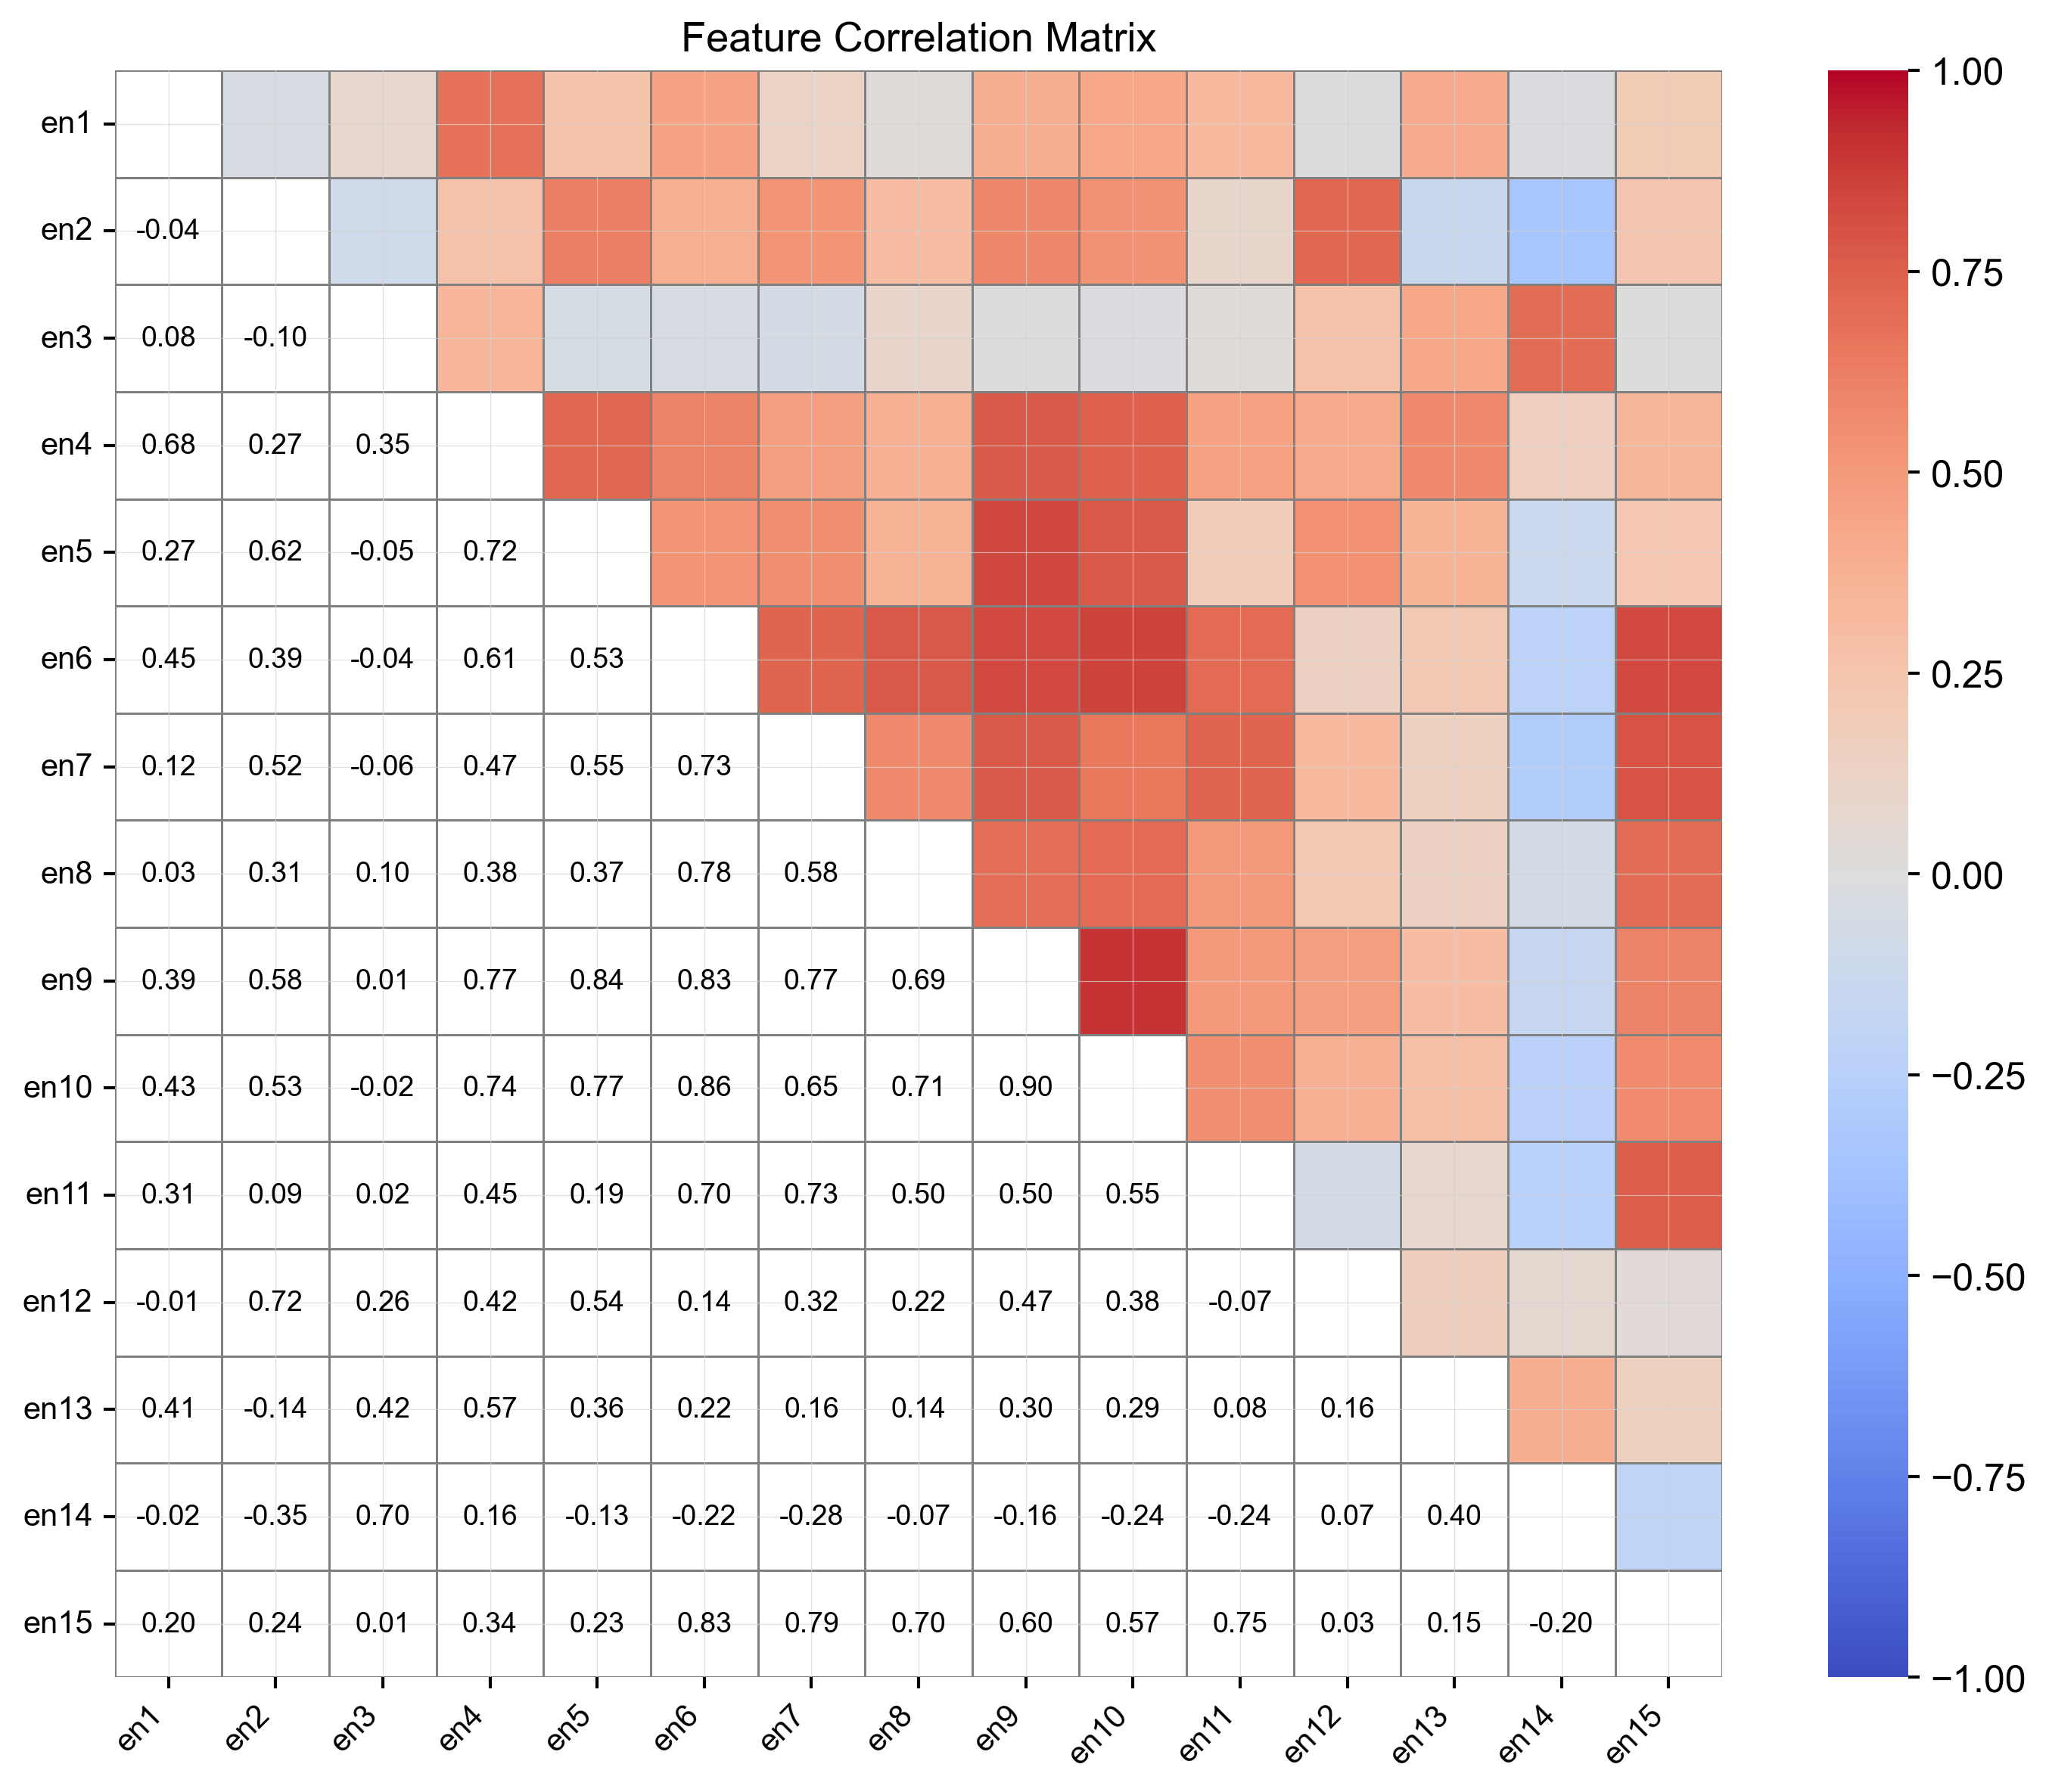

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 特征数据
cols = [f"en{i}" for i in range(1,16)]
X_df = df[cols]

# 相关系数矩阵
corr_matrix = X_df.corr()

# 创建一个 mask，只显示上三角的颜色
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

fig, ax = plt.subplots(figsize=(10,8))

# 上三角热力图（颜色）
sns.heatmap(
    corr_matrix,
    mask=~mask,            # 上三角
    annot=False,           # 不显示数字
    cmap="coolwarm",
    vmin=-1, vmax=1,
    cbar=True,
    linewidths=0.3,
    linecolor='gray',
    square=True,
    ax=ax
)

# 下三角数字显示
for i in range(corr_matrix.shape[0]):
    for j in range(i):
        ax.text(j+0.5, i+0.5,
                f"{corr_matrix.iloc[i,j]:.2f}",
                ha='center', va='center', fontsize=9, color='black')

# 坐标轴和标题
ax.set_xticks(np.arange(corr_matrix.shape[0])+0.5)
ax.set_yticks(np.arange(corr_matrix.shape[0])+0.5)
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(corr_matrix.columns, rotation=0, fontsize=10)
ax.set_title("Feature Correlation Matrix", fontsize=13)

# 极细边框
for spine in ax.spines.values():
    spine.set_linewidth(0.3)

ax.grid(
         linestyle='-', 
         alpha=0.7, 
         color='lightgray', 
         linewidth=0.3)

plt.tight_layout()
plt.savefig("Feature_Correlation_Matrix_Professional.pdf", dpi=300)
plt.show()


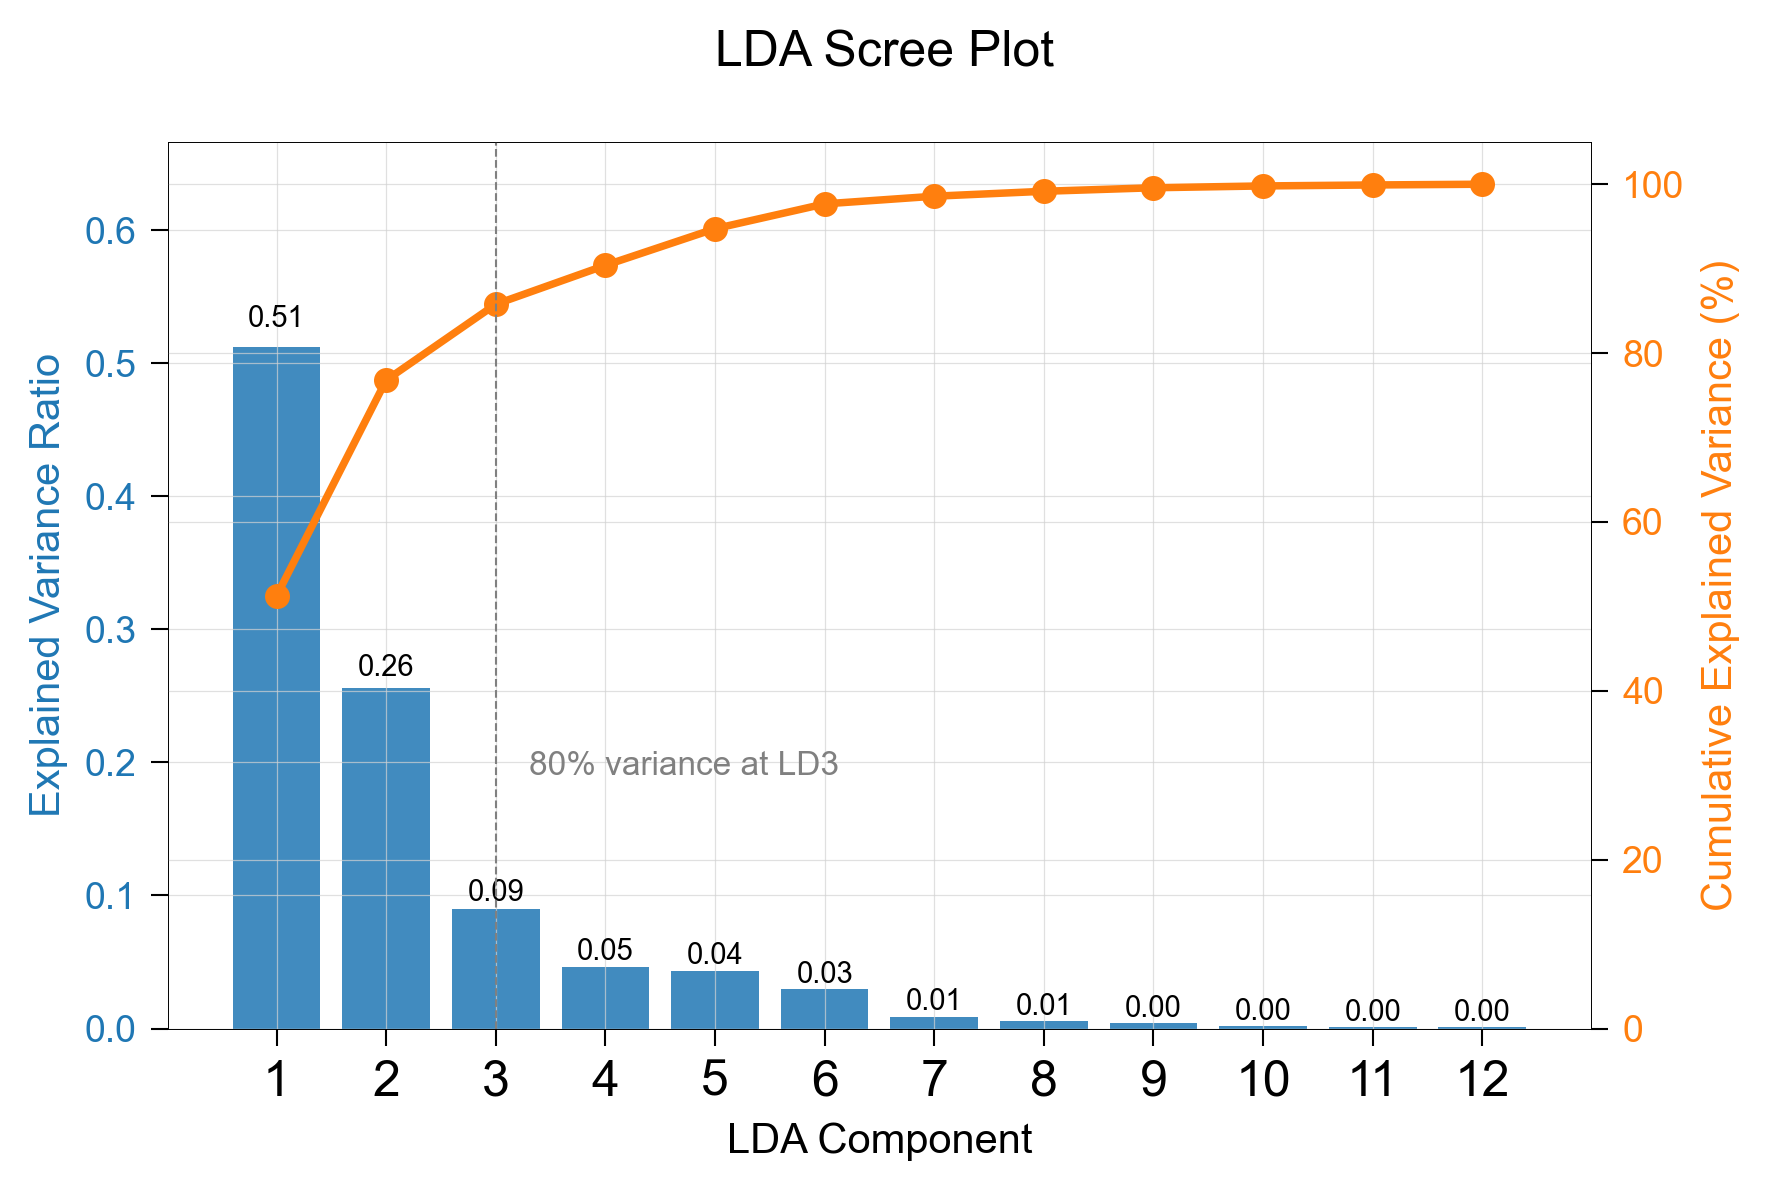

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 explained_var 和 cum_var 已经由 LDA fit 得到
explained_var = lda.explained_variance_ratio_
cum_var = np.cumsum(explained_var)
ld_indices = np.arange(1, len(explained_var)+1)

fig, ax1 = plt.subplots(figsize=(6,4))

# ------------------- 左轴：柱状图 -------------------
bars = ax1.bar(ld_indices, explained_var, color="#1f77b4", alpha=0.85,
               edgecolor='k', linewidth=0, label="Individual LD")
ax1.set_xlabel("LDA Component", fontsize=10)
ax1.set_ylabel("Explained Variance Ratio", fontsize=10, color="#1f77b4")
ax1.tick_params(axis='y', labelcolor="#1f77b4", labelsize=9, width=0.5, length=4)
ax1.tick_params(axis='x', width=0.5, length=4)
ax1.set_xticks(ld_indices)
ax1.set_ylim(0, max(explained_var)*1.3)

# 柱顶标注每个 LD 的贡献率
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., 1.02*height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=7)

# ------------------- 右轴：累计折线 -------------------
ax2 = ax1.twinx()
ax2.plot(ld_indices, cum_var*100, color="#ff7f0e", marker='o', markersize=5,
         linewidth=1.8, label="Cumulative Explained")
ax2.set_ylabel("Cumulative Explained Variance (%)", fontsize=10, color="#ff7f0e")
ax2.tick_params(axis='y', labelcolor="#ff7f0e", labelsize=9, width=0.5, length=4)
ax2.set_ylim(0, 105)

# 标注达到80%累计解释率的LD
threshold = 80
first_above = np.where(cum_var*100 >= threshold)[0][0] + 1
ax2.axvline(x=first_above, color='grey', linestyle='--', linewidth=0.5)
ax2.text(first_above+0.3, 30, f'{threshold}% variance at LD{first_above}',
         color='grey', fontsize=8)

# ------------------- 坐标轴极细 -------------------
for spine in ax1.spines.values():
    spine.set_linewidth(0.2)
for spine in ax2.spines.values():
    spine.set_linewidth(0.2)

ax1.grid(
         linestyle='-', 
         alpha=0.7, 
         color='lightgray', 
         linewidth=0.3)
ax2.grid(
         linestyle='-', 
         alpha=0.7, 
         color='lightgray', 
         linewidth=0.3)
# ------------------- 网格和美化 -------------------
fig.suptitle("LDA Scree Plot", fontsize=12)
fig.tight_layout()

# ------------------- 高精度输出 -------------------
plt.savefig("Fig2a_LDA_scree_Nature_Final.pdf", dpi=300)
plt.show()


In [8]:
import pandas as pd

# ------------------- 保存 LDA Scree 数据到 CSV -------------------
df_lda_scree = pd.DataFrame({
    "LD": ld_indices,
    "explained_variance_ratio": explained_var,
    "cumulative_explained_variance": cum_var,
    "cumulative_explained_variance_%": cum_var * 100
})

df_lda_scree.to_csv("Fig2a_LDA_scree_data.csv", index=False)

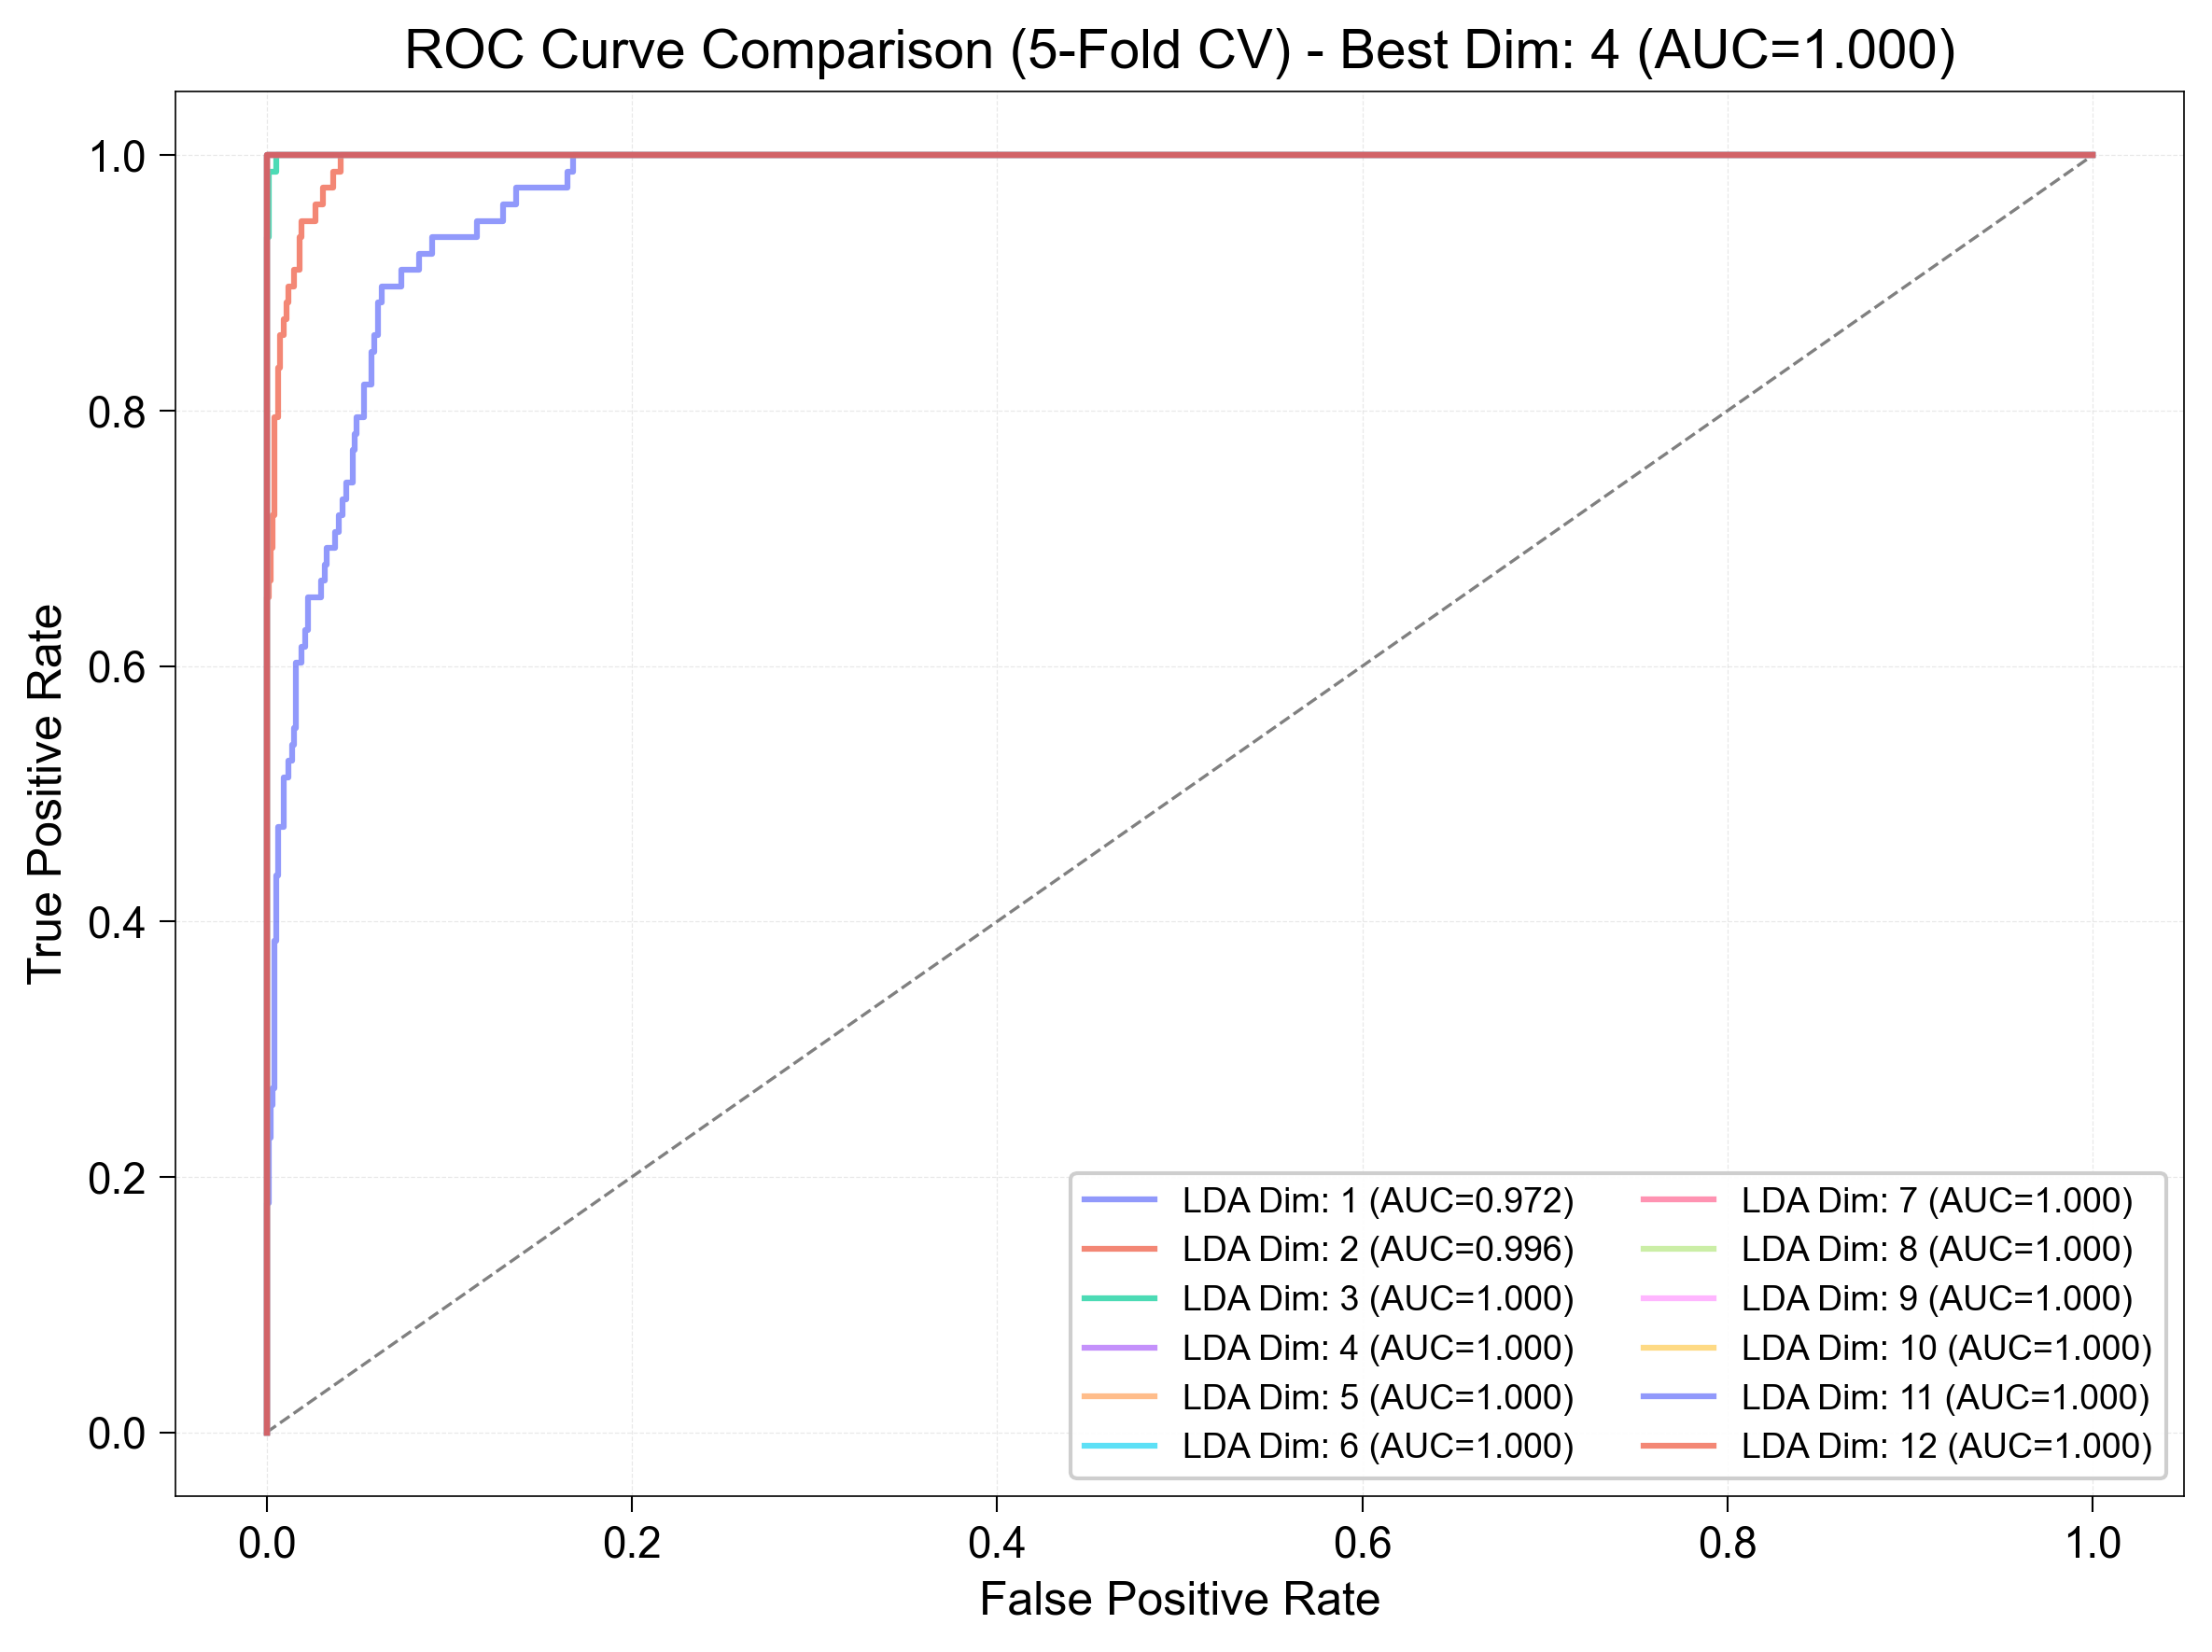


最佳 LDA 维度为: 4，对应的平均 AUC 值为: 1.000


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

# ===================== 数据读取与预处理 =====================
df = pd.read_csv("../data/data-923.csv")
cols = [f"en{i}" for i in range(1,16)]
X = df[cols].values
y_raw = df["cate"].astype(str).values
le = LabelEncoder()
y = le.fit_transform(y_raw)
class_names = le.classes_
n_classes = len(class_names) # 类别数

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===================== 遍历维度与性能评估 =====================

# LDA 最大维度为 n_classes - 1 (这里是 13 - 1 = 12)
max_lda_dim = n_classes - 1 

# 存储每种维度下的平均 ROC 数据
results_by_dim = {}

# 使用 Plotly 的颜色，确保不同维度有区分
colors_extended = px.colors.qualitative.Plotly * 2 

# 遍历所有可能的 LDA 维度
for n_dim in range(1, max_lda_dim + 1):
    
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_true_all_cv, y_prob_all_cv = [], []

    # 进行 5 折交叉验证
    for train_idx, test_idx in kf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # 1. LDA 降维
        lda = LinearDiscriminantAnalysis(n_components=n_dim)
        X_train_lda = lda.fit_transform(X_train, y_train)
        X_test_lda = lda.transform(X_test)

        # 2. GaussianNB 模型训练与预测
        model = GaussianNB()
        model.fit(X_train_lda, y_train)
        
        # 收集真实标签和预测概率
        y_prob = model.predict_proba(X_test_lda)
        y_true_all_cv.append(y_test)
        y_prob_all_cv.append(y_prob)

    # 3. 汇总 5 折 CV 结果
    y_true_all = np.concatenate(y_true_all_cv)
    y_prob_all = np.concatenate(y_prob_all_cv)

    # 4. 计算整体的 AUC 和 ROC 曲线
    y_true_bin = label_binarize(y_true_all, classes=np.arange(n_classes))
    
    # 将多分类问题视为 One-vs-All，并压平成一维进行整体 ROC 计算
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_prob_all.ravel())
    roc_auc = auc(fpr, tpr)

    # 存储结果
    results_by_dim[n_dim] = {
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc,
        'color': colors_extended[n_dim - 1] # 确保每条曲线颜色不同
    }

# ===================== 绘图：对比所有维度的 ROC 曲线 =====================
fig, ax = plt.subplots(figsize=(8,6))
ax.plot([0,1], [0,1], '--', color='grey', lw=0.8)

# 绘制每种维度的 ROC 曲线
best_auc = -1
best_dim = 0

for n_dim, result in results_by_dim.items():
    label = f"LDA Dim: {n_dim} (AUC={result['auc']:.3f})"
    ax.plot(result['fpr'], result['tpr'], 
            color=result['color'], 
            lw=1.5, 
            label=label,
            alpha=0.7)
    
    # 记录最佳性能的维度
    if result['auc'] > best_auc:
        best_auc = result['auc']
        best_dim = n_dim

# 坐标轴、标题、网格
ax.set_xlabel("False Positive Rate", fontsize=12)
ax.set_ylabel("True Positive Rate", fontsize=12)
ax.set_title(f"ROC Curve Comparison (5-Fold CV) - Best Dim: {best_dim} (AUC={best_auc:.3f})", fontsize=14)
ax.tick_params(axis='both', labelsize=11, width=0.5, length=4)

# 极细坐标轴
for spine in ax.spines.values():
    spine.set_linewidth(0.4)

# 调整图例位置，避免遮挡曲线
ax.legend(fontsize=9, loc="lower right", frameon=True, framealpha=0.95, ncols=2)

ax.grid(linestyle='--', alpha=0.5, color='lightgray', linewidth=0.3)

plt.tight_layout()
plt.savefig("Fig2b_ROC_LDA_Dimension_Comparison.pdf", dpi=300)
plt.show()

print(f"\n最佳 LDA 维度为: {best_dim}，对应的平均 AUC 值为: {best_auc:.3f}")

In [11]:
# ===================== 保存 AUC 汇总结果 =====================
auc_summary = pd.DataFrame([
    {"lda_dim": n_dim, "auc": result["auc"]}
    for n_dim, result in results_by_dim.items()
])

auc_summary.to_csv(
    "Fig2b_LDA_Dimension_AUC_Summary.csv",
    index=False
)
# ===================== 保存 ROC 曲线数据 =====================
roc_records = []

for n_dim, result in results_by_dim.items():
    fpr = result["fpr"]
    tpr = result["tpr"]
    
    for i in range(len(fpr)):
        roc_records.append({
            "lda_dim": n_dim,
            "fpr": fpr[i],
            "tpr": tpr[i]
        })

df_roc = pd.DataFrame(roc_records)

df_roc.to_csv(
    "Fig2b_LDA_Dimension_ROC_Curves.csv",
    index=False
)


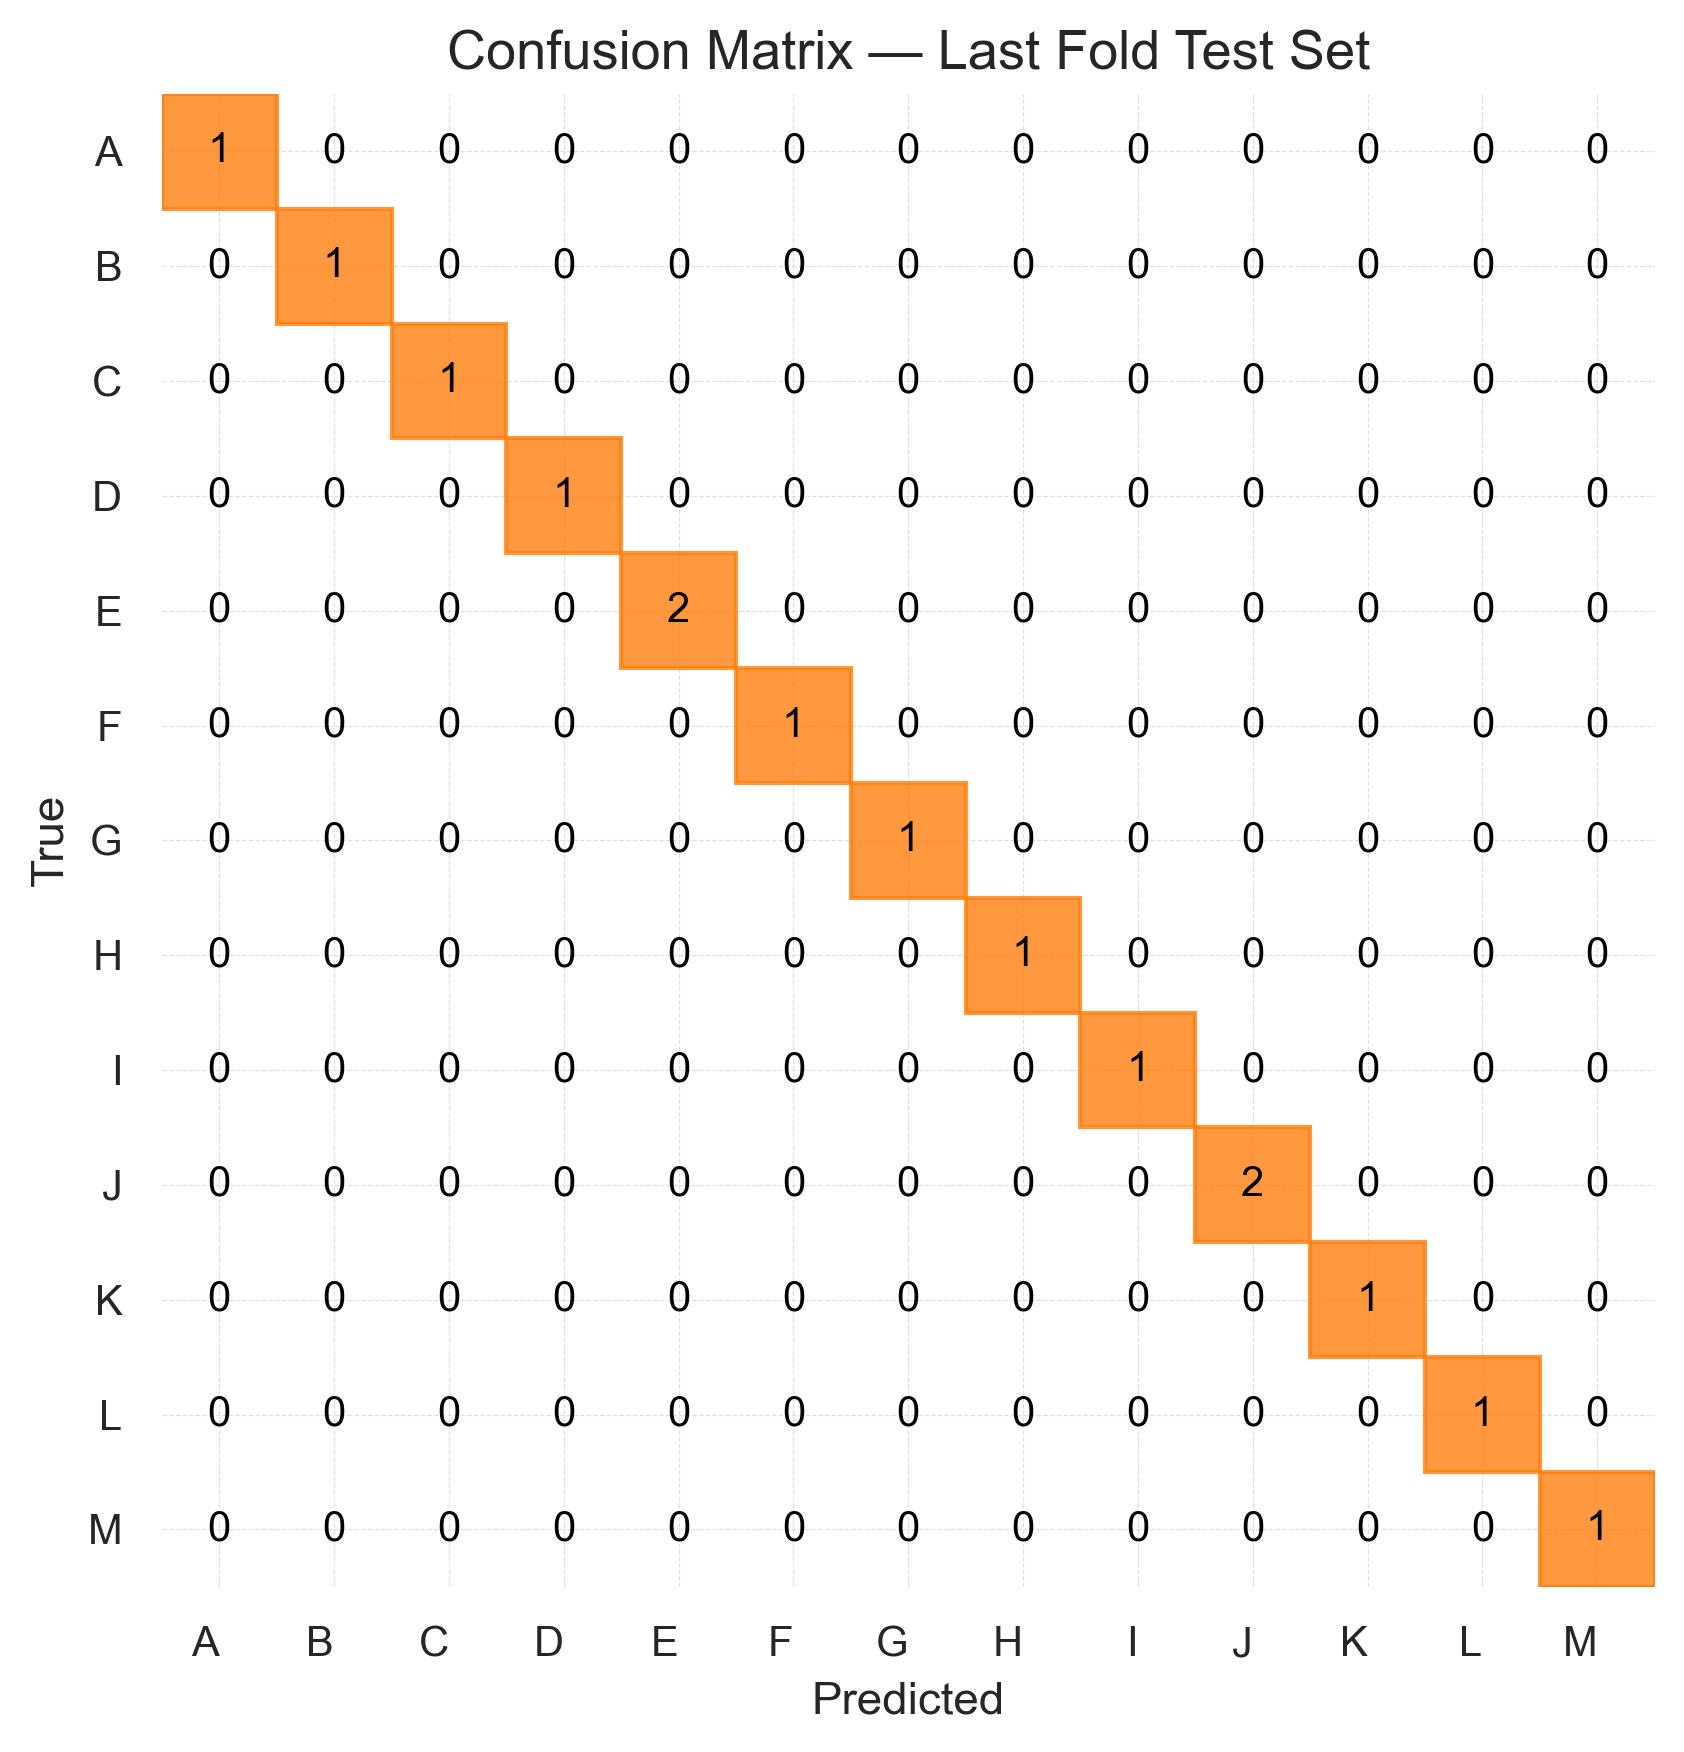

In [155]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# ===================== 获取最后一折测试集结果 =====================
# X_test, y_test, y_pred 是循环中最后一折的值
# 如果你希望展示特定折，可改成对应索引
cm = confusion_matrix(y_test, y_pred)
n_classes = cm.shape[0]

# ===================== 绘图 =====================
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor("white")
diag_color = "#ff7f0e"  # 对角线颜色

# 绘制对角线矩形
for i in range(n_classes):
    ax.add_patch(plt.Rectangle((i, i), 1, 1, fill=True, color=diag_color, alpha=0.8))

# 添加绝对值注释
for i in range(n_classes):
    for j in range(n_classes):
        ax.text(j+0.5, i+0.5, str(cm[i,j]),
                ha='center', va='center', fontsize=10, color='black')

# 设置刻度和标签
ax.set_xticks(np.arange(n_classes)+0.5)
ax.set_yticks(np.arange(n_classes)+0.5)
ax.set_xticklabels(class_names, ha='right', fontsize=10)
ax.set_yticklabels(class_names, fontsize=10)

# 坐标轴和标题
ax.set_xlabel("Predicted", fontsize=11)
ax.set_ylabel("True", fontsize=11)
ax.set_title("Confusion Matrix — Last Fold Test Set", fontsize=13)

# 隐藏边框
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_xlim(0, n_classes)
ax.set_ylim(0, n_classes)
ax.invert_yaxis()
ax.set_aspect('equal')

ax.grid(
         linestyle='--', 
         alpha=0.7, 
         color='lightgray', 
         linewidth=0.3)

plt.tight_layout()
plt.savefig("ConfusionMatrix_TestSet.pdf", dpi=300)
plt.show()
